In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('corona_fake.csv')
print(df.shape)
df.head()

(1164, 4)


,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake


In [3]:
df = df.fillna('')

In [4]:
df['title_text_source'] = df['title'] + ' ' + df['text'] + ' ' + df['source']
df.head()

,title,text,source,label,title_text_source
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake,Due to the recent outbreak for the Coronavirus...
1,,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake,Hydroxychloroquine has been shown to have a 1...
2,,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake,Fact: Hydroxychloroquine has been shown to ha...
3,,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake,The Corona virus is a man made virus created ...
4,,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake,Doesn’t @BillGates finance research at the Wu...


In [5]:
df = df[df['label']!='']
print(df['label'].unique())

['Fake' 'TRUE' 'fake']


In [6]:
df.loc[df['label'] == 'fake', 'label'] = 'FAKE'
df.loc[df['label'] == 'Fake', 'label'] = 'FAKE'

In [7]:
no_of_fakes = df.loc[df['label'] == 'FAKE'].count()[0]
no_of_trues = df.loc[df['label'] == 'TRUE'].count()[0]
print(no_of_fakes)
print(no_of_trues)

575
584


In [8]:
stop_words = set(stopwords.words('english'))
def clean(text):
    # Lowering letters
    text = text.lower()
    
    # Removing html tags
    text = re.sub(r'<[^>]*>', '', text)
    
    # Removing twitter usernames
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    
    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]','',text)
    
    # Removing numbers
    text = re.sub('[^a-zA-Z]',' ',text)
    
    word_tokens = word_tokenize(text)
    
    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_token)
    
    # Joining words
    text = (' '.join(filtered_sentence))
    return text

In [9]:
df['title_text_source'] = df['title_text_source'].apply(clean)

In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['title_text_source'].values)
X = X.toarray()

In [11]:
y = df['label'].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11)

In [13]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9633225458468176
0.9353448275862069


In [15]:
predictions = clf.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, predictions)

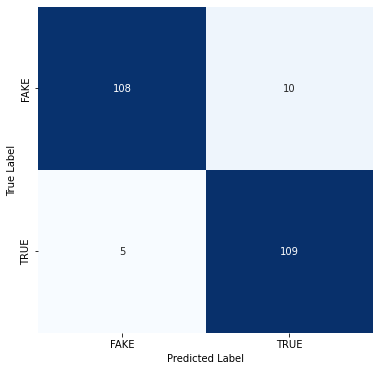

In [17]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'], cmap=plt.cm.Blues, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
sentence = 'The Corona virus is a man made virus created in a Wuhan laboratory. Doesn’t @BillGates finance research at the Wuhan lab?'
sentence = clean(sentence)
vectorized_sentence = vectorizer.transform([sentence]).toarray()
clf.predict(vectorized_sentence)

array(['FAKE'], dtype='<U4')

In [19]:
result = clf.predict(vectorized_sentence)
print(result[0])

FAKE
